In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv("C:/Users/muham/OneDrive - TqPharma/Documents/THESNIM FILES/QVI_transaction_data.csv")
df2 = pd.read_csv("C:/Users/muham/OneDrive - TqPharma/Documents/THESNIM FILES/QVI_purchase_behaviour.csv")

In [5]:
df1.head(10)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [6]:
df1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [7]:
df2.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [8]:
df1["DATE"] = pd.to_timedelta(df1["DATE"], unit="D") + pd.Timestamp("1899-12-30")
df1["DATE"] = df1["DATE"].dt.date


In [9]:
df1.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [10]:
df1["PROD_NAME"].describe()


count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [11]:
# Check basic info
print(df1["PROD_NAME"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 264836 entries, 0 to 264835
Series name: PROD_NAME
Non-Null Count   Dtype 
--------------   ----- 
264836 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB
None


In [12]:
df1["name_length"] = df1["PROD_NAME"].str.len()
df1["word_count"] = df1["PROD_NAME"].str.split().str.len()

df1[["name_length", "word_count"]].describe()


,name_length,word_count
count,264836.000000,264836.000000
mean,33.511966,5.131795
std,6.061941,1.323607
min,17.000000,2.000000
25%,30.000000,4.000000
50%,35.000000,5.000000
75%,39.000000,6.000000
max,40.000000,8.000000


In [13]:
# Count missing values
print("Missing PROD_NAME values:", df1["PROD_NAME"].isna().sum())

Missing PROD_NAME values: 0


In [14]:
# Get unique values
unique_names = df1["PROD_NAME"].unique()
print("Number of unique product names:", len(unique_names))

# View the first 20 unique names
print(unique_names[:20])


Number of unique product names: 114
['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g']


In [15]:
# Empty strings
empty_names = df1[df1["PROD_NAME"].str.strip() == ""]
print("Empty PROD_NAME rows:", len(empty_names))

# Very short names (less than 3 characters)
short_names = df1[df1["PROD_NAME"].str.len() < 3]
print("Very short PROD_NAME rows:", len(short_names))

# Names that are completely numeric
numeric_names = df1[df1["PROD_NAME"].str.match(r'^\d+$')]
print("Numeric PROD_NAME rows:", len(numeric_names))


Empty PROD_NAME rows: 0
Very short PROD_NAME rows: 0
Numeric PROD_NAME rows: 0


In [16]:
# Names with special characters (excluding letters, numbers, space)
unusual_chars = df1[df1["PROD_NAME"].str.contains(r'[^a-zA-Z0-9\s]', regex=True)]
print("PROD_NAME with unusual characters:", len(unusual_chars))


PROD_NAME with unusual characters: 86585


In [17]:
# Combine all suspicious entries
suspicious = pd.concat([empty_names, short_names, numeric_names, unusual_chars]).drop_duplicates()
print(suspicious[["PROD_NAME"]].head(20))  # show first 20


                                   PROD_NAME
3     Smiths Chip Thinly  S/Cream&Onion 175g
4   Kettle Tortilla ChpsHny&Jlpno Chili 150g
6   Smiths Crinkle Chips Salt & Vinegar 330g
9      Grain Waves Sour    Cream&Chives 210G
10  Smiths Crinkle Chips Salt & Vinegar 330g
14            Thins Chips Light&  Tangy 175g
17    NCC Sour Cream &    Garden Chives 175g
21    NCC Sour Cream &    Garden Chives 175g
24  Kettle Tortilla ChpsHny&Jlpno Chili 150g
28      Red Rock Deli Thai  Chilli&Lime 150g
31              Pringles Sweet&Spcy BBQ 134g
32  Red Rock Deli SR    Salsa & Mzzrlla 150g
34   Red Rock Deli Sp    Salt & Truffle 150G
35  Smiths Thinly       Swt Chli&S/Cream175G
38            Thins Chips Light&  Tangy 175g
45    Kettle Mozzarella   Basil & Pesto 175g
49  Kettle Sensations   Camembert & Fig 150g
53   Smiths Crinkle Cut  Salt & Vinegar 170g
56     GrnWves Plus Btroot & Chilli Jam 180g
58  Kettle Tortilla ChpsHny&Jlpno Chili 150g


In [18]:
#Clean text remove special characters & digits
df1["clean"] = (
    df1["PROD_NAME"]
    .str.lower()
    .str.replace(r"[^a-z\s]", "", regex=True)
)


In [19]:
#Split into Words
df1["words"] = df1["clean"].str.split()


In [20]:

#Count Word Freequenzy
from collections import Counter

word_counts = Counter()

df1["words"].dropna().apply(word_counts.update)

#word_summary = pd.DataFrame(word_counts.most_common(), columns=["word", "count"])
#print(word_summary.head(20))
word_freq = (
    pd.DataFrame(word_counts.items(), columns=["word", "count"])
    .sort_values(by="count", ascending=False)
    .reset_index(drop=True)
)

print(word_freq.head(20))   # show top 20 words



        word   count
0          g  251231
1      chips   49770
2     kettle   41288
3     smiths   28860
4       salt   27976
5     cheese   27890
6   pringles   25102
7    doritos   24962
8    crinkle   23960
9       corn   22063
10  original   21560
11       cut   20754
12      chip   18645
13     salsa   18094
14   chicken   15407
15       sea   14145
16     thins   14075
17    chilli   13895
18      sour   13882
19    crisps   12607


In [21]:
unique_words = set(word_counts.keys())
len(unique_words)


195

In [22]:
df1 = df1[~df1["PROD_NAME"].str.contains("salsa", case=False, na=False)]


In [23]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,name_length,word_count,clean,words
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,38,4,natural chip compny seasaltg,"[natural, chip, compny, seasaltg]"
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,24,4,ccs nacho cheese g,"[ccs, nacho, cheese, g]"
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,38,6,smiths crinkle cut chips chicken g,"[smiths, crinkle, cut, chips, chicken, g]"
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,38,5,smiths chip thinly screamonion g,"[smiths, chip, thinly, screamonion, g]"
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,40,5,kettle tortilla chpshnyjlpno chili g,"[kettle, tortilla, chpshnyjlpno, chili, g]"


In [24]:
df1.info()
df1.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            246742 non-null  object 
 1   STORE_NBR       246742 non-null  int64  
 2   LYLTY_CARD_NBR  246742 non-null  int64  
 3   TXN_ID          246742 non-null  int64  
 4   PROD_NBR        246742 non-null  int64  
 5   PROD_NAME       246742 non-null  object 
 6   PROD_QTY        246742 non-null  int64  
 7   TOT_SALES       246742 non-null  float64
 8   name_length     246742 non-null  int64  
 9   word_count      246742 non-null  int64  
 10  clean           246742 non-null  object 
 11  words           246742 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 24.5+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,name_length,word_count,clean,words
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246742.000000,246742.000000,246742.000000,246742,246742
unique,364,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,105,105
top,2018-12-24,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,NaN,NaN,kettle mozzarella basil pesto g,"[kettle, mozzarella, basil, pesto, g]"
freq,865,NaN,NaN,NaN,NaN,3304,NaN,NaN,NaN,NaN,3304,3304
mean,NaN,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.321322,33.333368,5.028086,NaN,NaN
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,NaN,0.659831,3.077828,6.076707,1.214640,NaN,NaN
min,NaN,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000,17.000000,2.000000,NaN,NaN
25%,NaN,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000,30.000000,4.000000,NaN,NaN
50%,NaN,130.000000,1.303670e+05,1.351830e+05,53.000000,NaN,2.000000,7.400000,35.000000,5.000000,NaN,NaN
75%,NaN,203.000000,2.030840e+05,2.026538e+05,87.000000,NaN,2.000000,8.800000,38.000000,6.000000,NaN,NaN


In [25]:
df1.isnull().sum()


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
name_length       0
word_count        0
clean             0
words             0
dtype: int64

In [26]:
df1[df1.isnull().any(axis=1)]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,name_length,word_count,clean,words


In [27]:
import numpy as np

numeric_cols = df1.select_dtypes(include=[np.number]).columns

print("Possible outliers by column:")
for col in numeric_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower) | (df1[col] > upper)][col].count()
    print(f"{col}: {outliers} outliers")


Possible outliers by column:
STORE_NBR: 0 outliers
LYLTY_CARD_NBR: 42 outliers
TXN_ID: 1 outliers
PROD_NBR: 0 outliers
PROD_QTY: 26672 outliers
TOT_SALES: 669 outliers
name_length: 3078 outliers
word_count: 0 outliers


In [28]:
# two transactions where 200 packets of chips are bought in one transaction
#outliers_200 = df1[df1["PROD_QTY"] == 200]
#outliers_200


In [29]:
#Check if they belong to the same customer
#outliers_200["LYLTY_CARD_NBR"].unique()


In [30]:
#Identify the customer who bought 200 packets
customer_id = df1[df1["PROD_QTY"] == 200]["LYLTY_CARD_NBR"].unique()[0]
customer_id



226000

In [31]:
#Filter all transactions by that customer
customer_transactions = df1[df1["LYLTY_CARD_NBR"] == customer_id]
customer_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,name_length,word_count,clean,words
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,32,5,dorito corn chp supreme g,"[dorito, corn, chp, supreme, g]"
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,32,5,dorito corn chp supreme g,"[dorito, corn, chp, supreme, g]"


In [32]:

#Count how many transactions the customer has
customer_transactions.shape[0]


2

In [33]:
customer_transactions["PROD_NAME"].value_counts()


PROD_NAME
Dorito Corn Chp     Supreme 380g    2
Name: count, dtype: int64

In [34]:
# Replace with the actual loyalty card number
customer_id = 226000  

# Remove all transactions for this customer
df1 = df1[df1["LYLTY_CARD_NBR"] != customer_id]

# Verify removal
print(df1[df1["LYLTY_CARD_NBR"] == customer_id])  # should show empty dataframe


Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, name_length, word_count, clean, words]
Index: []


In [35]:
# General numeric summary after removing the outlier customer
df1.describe(include="all").T.assign(null_count=df1.isnull().sum())


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null_count
DATE,246740,364,2018-12-24,865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
STORE_NBR,246740.0,NaN,NaN,NaN,135.050361,76.786971,1.0,70.0,130.0,203.0,272.0,0
LYLTY_CARD_NBR,246740.0,NaN,NaN,NaN,135530.251641,80715.196924,1000.0,70015.0,130367.0,203083.25,2373711.0,0
TXN_ID,246740.0,NaN,NaN,NaN,135130.360627,78147.604242,1.0,67568.75,135181.5,202652.25,2415841.0,0
PROD_NBR,246740.0,NaN,NaN,NaN,56.352213,33.695235,1.0,26.0,53.0,87.0,114.0,0
PROD_NAME,246740,105,Kettle Mozzarella Basil & Pesto 175g,3304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
PROD_QTY,246740.0,NaN,NaN,NaN,1.906456,0.342499,1.0,2.0,2.0,2.0,5.0,0
TOT_SALES,246740.0,NaN,NaN,NaN,7.316113,2.474897,1.7,5.8,7.4,8.8,29.5,0
name_length,246740.0,NaN,NaN,NaN,33.333379,6.07673,17.0,30.0,35.0,38.0,40.0,0
word_count,246740.0,NaN,NaN,NaN,5.028086,1.214645,2.0,4.0,5.0,6.0,8.0,0


In [36]:
# Overview of dataset
df1.info()

# Check for nulls
nulls = df1.isnull().sum()
print("Null values per column:\n", nulls)


<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            246740 non-null  object 
 1   STORE_NBR       246740 non-null  int64  
 2   LYLTY_CARD_NBR  246740 non-null  int64  
 3   TXN_ID          246740 non-null  int64  
 4   PROD_NBR        246740 non-null  int64  
 5   PROD_NAME       246740 non-null  object 
 6   PROD_QTY        246740 non-null  int64  
 7   TOT_SALES       246740 non-null  float64
 8   name_length     246740 non-null  int64  
 9   word_count      246740 non-null  int64  
 10  clean           246740 non-null  object 
 11  words           246740 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 24.5+ MB
Null values per column:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
na

In [37]:
# Count transactions by date
transactions_by_date = df1.groupby("DATE")["TXN_ID"].nunique().reset_index()

# Rename columns for clarity
transactions_by_date.columns = ["DATE", "Num_Transactions"]

# Sort by date
transactions_by_date = transactions_by_date.sort_values("DATE").reset_index(drop=True)

# Display
print(transactions_by_date.head(20))  # top 20 dates


          DATE  Num_Transactions
0   2018-07-01               659
1   2018-07-02               647
2   2018-07-03               669
3   2018-07-04               663
4   2018-07-05               658
5   2018-07-06               709
6   2018-07-07               693
7   2018-07-08               649
8   2018-07-09               690
9   2018-07-10               649
10  2018-07-11               696
11  2018-07-12               714
12  2018-07-13               723
13  2018-07-14               657
14  2018-07-15               708
15  2018-07-16               675
16  2018-07-17               689
17  2018-07-18               684
18  2018-07-19               632
19  2018-07-20               683


          DATE  Num_Transactions
177 2018-12-25               NaN


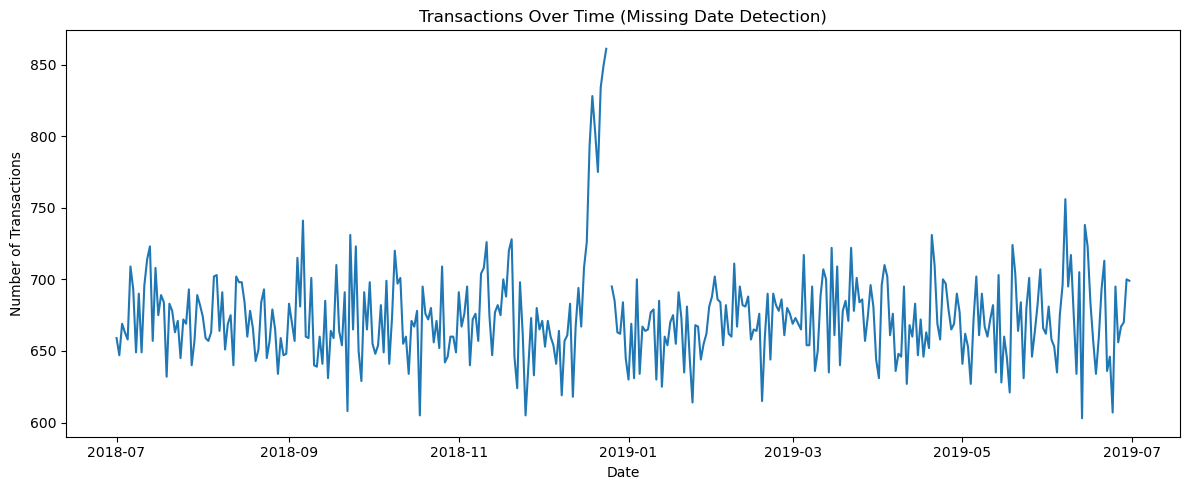

In [38]:


# Create full date range
full_dates = pd.DataFrame({
    "DATE": pd.date_range(start="2018-07-01", end="2019-06-30", freq="D")
})

df1["DATE"] = pd.to_datetime(df1["DATE"], errors="coerce")
# Count transactions per date
txn_by_date = df1.groupby("DATE")["TXN_ID"].nunique().reset_index()
txn_by_date.columns = ["DATE", "Num_Transactions"]
# Merge with full date range
merged = full_dates.merge(txn_by_date, on="DATE", how="left")
#Missing date will appear as NaN
missing_date = merged[merged["Num_Transactions"].isna()]
print(missing_date)


# Plot
plt.figure(figsize=(12,5))
plt.plot(merged["DATE"], merged["Num_Transactions"])
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time (Missing Date Detection)")
plt.tight_layout()
plt.show()


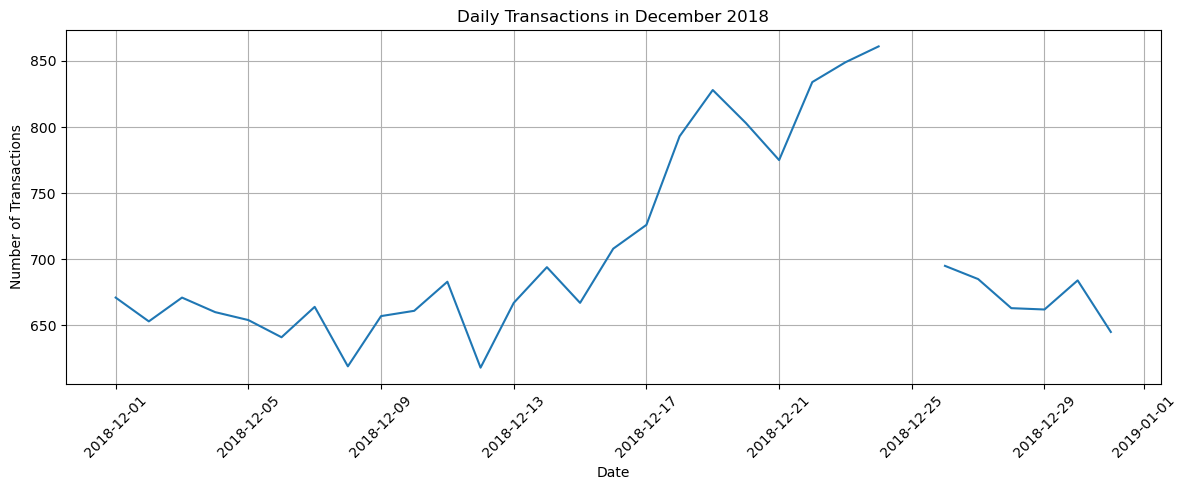

In [39]:
# Filter only December 2018
dec_df = merged[(merged["DATE"] >= "2018-12-01") & 
                (merged["DATE"] <= "2018-12-31")]

plt.figure(figsize=(12,5))
plt.plot(dec_df["DATE"], dec_df["Num_Transactions"])
plt.title("Daily Transactions in December 2018")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
import re

# Extract digits before 'g' (e.g., 90g, 175g)
df1["PACK_SIZE"] = df1["PROD_NAME"].str.extract(r'(\d+)\s*g', expand=False)

# If PACK_SIZE still empty, extract standalone numbers (e.g., 5pk or 6 pack)
df1["PACK_SIZE"] = df1["PACK_SIZE"].fillna(
    df1["PROD_NAME"].str.extract(r'(\d+)', expand=False)
)

# Convert to numeric
df1["PACK_SIZE"] = pd.to_numeric(df1["PACK_SIZE"], errors="coerce")
df1["PACK_SIZE"]

0         175
1         175
2         170
3         175
4         150
         ... 
264831    175
264832    175
264833    170
264834    150
264835    175
Name: PACK_SIZE, Length: 246740, dtype: int64

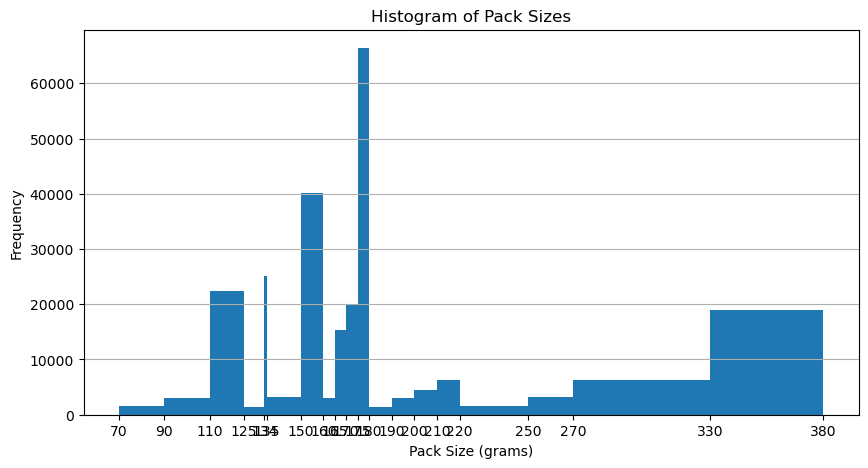

In [41]:
#Plot histogram for PACK_SIZE (categorical)
plt.figure(figsize=(10,5))
plt.hist(df1["PACK_SIZE"].dropna(), bins=sorted(df1["PACK_SIZE"].dropna().unique()))
plt.title("Histogram of Pack Sizes")
plt.xlabel("Pack Size (grams)")
plt.ylabel("Frequency")
plt.xticks(sorted(df1["PACK_SIZE"].dropna().unique()))
plt.grid(axis='y')
plt.show()


In [42]:
#Extract BRAND NAME from PROD_NAME
df1["BRAND"] = df1["PROD_NAME"].str.split().str[0]
df1["BRAND"].head(20)

0      Natural
1          CCs
2       Smiths
3       Smiths
4       Kettle
6       Smiths
7        Grain
8      Doritos
9        Grain
10      Smiths
11      Kettle
12    Twisties
13          WW
14       Thins
15         CCs
16      Burger
17         NCC
18     Doritos
19    Cheezels
20      Smiths
Name: BRAND, dtype: object

In [43]:
def extract_brand(name):
    name = name.lower()
    # Known multi-word brands
    brands = ["red rock", "kettle", "grain waves", "natural", "doritos", "twisties", "pringles", "smiths"]
    for b in brands:
        if b in name:
            return b.title()
    # fallback → first word
    return name.split()[0].title()

df1["BRAND"] = df1["PROD_NAME"].apply(extract_brand)
df1["BRAND"].head(20)

0         Natural
1             Ccs
2          Smiths
3          Smiths
4          Kettle
6          Smiths
7     Grain Waves
8         Doritos
9     Grain Waves
10         Smiths
11         Kettle
12       Twisties
13             Ww
14          Thins
15            Ccs
16         Burger
17            Ncc
18        Doritos
19       Cheezels
20         Smiths
Name: BRAND, dtype: object

In [44]:
df1['BRAND'].value_counts()


BRAND
Kettle         41288
Smiths         27390
Pringles       25102
Doritos        22041
Thins          14075
Rrd            11894
Infuzions      11057
Ww             10320
Cobs            9693
Tostitos        9471
Twisties        9454
Tyrrells        6442
Grain Waves     6272
Natural         6050
Cheezels        4603
Ccs             4551
Red Rock        4427
Dorito          3183
Infzns          3144
Smith           2963
Cheetos         2927
Snbts           1576
Burger          1564
Woolworths      1516
Grnwves         1468
Sunbites        1432
Ncc             1419
French          1418
Name: count, dtype: int64

In [45]:
#Remove duplicate rows based on BRAND
df_unique = df1.drop_duplicates(subset='BRAND')
#Get only the unique brand list
unique_brands = df1['BRAND'].unique()
print(unique_brands)

['Natural' 'Ccs' 'Smiths' 'Kettle' 'Grain Waves' 'Doritos' 'Twisties' 'Ww'
 'Thins' 'Burger' 'Ncc' 'Cheezels' 'Infzns' 'Red Rock' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'Grnwves' 'Tyrrells' 'Cobs' 'French' 'Rrd' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


EXPLORATORY DATA ANALYSIS

In [47]:
df2.head(20)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [48]:
df2.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [49]:
df1.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'name_length', 'word_count',
       'clean', 'words', 'PACK_SIZE', 'BRAND'],
      dtype='object')

In [50]:
merged_df = df1.merge(df2, on='LYLTY_CARD_NBR', how='left')


In [51]:
merged_df.head(20)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,name_length,word_count,clean,words,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,38,4,natural chip compny seasaltg,"[natural, chip, compny, seasaltg]",175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,24,4,ccs nacho cheese g,"[ccs, nacho, cheese, g]",175,Ccs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,38,6,smiths crinkle cut chips chicken g,"[smiths, crinkle, cut, chips, chicken, g]",170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,38,5,smiths chip thinly screamonion g,"[smiths, chip, thinly, screamonion, g]",175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,40,5,kettle tortilla chpshnyjlpno chili g,"[kettle, tortilla, chpshnyjlpno, chili, g]",150,Kettle,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,40,7,smiths crinkle chips salt vinegar g,"[smiths, crinkle, chips, salt, vinegar, g]",330,Smiths,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,37,5,grain waves sweet chilli g,"[grain, waves, sweet, chilli, g]",210,Grain Waves,MIDAGE SINGLES/COUPLES,Budget
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,39,6,doritos corn chip mexican jalapeno g,"[doritos, corn, chip, mexican, jalapeno, g]",150,Doritos,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,37,5,grain waves sour creamchives g,"[grain, waves, sour, creamchives, g]",210,Grain Waves,MIDAGE SINGLES/COUPLES,Budget
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,40,7,smiths crinkle chips salt vinegar g,"[smiths, crinkle, chips, salt, vinegar, g]",330,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   name_length       246740 non-null  int64         
 9   word_count        246740 non-null  int64         
 10  clean             246740 non-null  object        
 11  words             246740 non-null  object        
 12  PACK_SIZE         246740 non-null  int64         
 13  BRAND             246740 non-null  object        
 14  LIFE

In [53]:
#After merging, check unmatched customer rows
unmatched = merged_df[merged_df['LIFESTAGE'].isna()]
unmatched


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,name_length,word_count,clean,words,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER


In [54]:
#Count how many unmatched transactions
merged_df['LIFESTAGE'].isna().sum()


0

In [55]:
#List the card numbers that didn’t match
unmatched_ids = merged_df.loc[merged_df['LIFESTAGE'].isna(), 'LYLTY_CARD_NBR'].unique()
unmatched_ids


array([], dtype=int64)

In [56]:
#set(df1['LYLTY_CARD_NBR']) - set(df2['LYLTY_CARD_NBR'])

set(df1['LYLTY_CARD_NBR']) - set(df2['LYLTY_CARD_NBR'])


set()

In [57]:
merged_df[merged_df['LIFESTAGE'].isna() | merged_df['PREMIUM_CUSTOMER'].isna()]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,name_length,word_count,clean,words,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER


In [58]:
# Write to CSV
merged_df.to_csv("merged_transactions.csv", index=False)

print("File saved as merged_transactions.csv")

File saved as merged_transactions.csv


DATA ANALYSIS ON CUSTOMER SEGMENTS

In [60]:
#Who spends the most on chips?
sales_by_segment = (
    merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']
    .sum()
    .reset_index()
    .sort_values(by='TOT_SALES', ascending=False)
)

sales_by_segment


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


In [61]:
#How many customers are in each segment?
customers_by_segment = (
    merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR']
    .nunique()
    .reset_index(name='unique_customers')
)

customers_by_segment


,LIFESTAGE,PREMIUM_CUSTOMER,unique_customers
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


In [62]:
#How many chips are bought per customer by segment
chips_by_segment = (
    merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY']
    .sum()
    .reset_index()
)

chips_by_segment


,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,8883
1,MIDAGE SINGLES/COUPLES,Mainstream,21213
2,MIDAGE SINGLES/COUPLES,Premium,14400
3,NEW FAMILIES,Budget,5241
4,NEW FAMILIES,Mainstream,4060
5,NEW FAMILIES,Premium,2769
6,OLDER FAMILIES,Budget,41853
7,OLDER FAMILIES,Mainstream,25804
8,OLDER FAMILIES,Premium,20239
9,OLDER SINGLES/COUPLES,Budget,32883


In [63]:
#What is the average chip price by customer segment?
merged_df['UNIT_PRICE'] = merged_df['TOT_SALES'] / merged_df['PROD_QTY']
avg_price_segment = (
    merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['UNIT_PRICE']
    .mean()
    .reset_index()
)

avg_price_segment


,LIFESTAGE,PREMIUM_CUSTOMER,UNIT_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
5,NEW FAMILIES,Premium,3.872110
6,OLDER FAMILIES,Budget,3.745340
7,OLDER FAMILIES,Mainstream,3.737077
8,OLDER FAMILIES,Premium,3.717000
9,OLDER SINGLES/COUPLES,Budget,3.882096


In [64]:
#Customer’s Total Spend & Proportion Spent on Chips
# Total spend per customer
total_spend = (
    merged_df.groupby('LYLTY_CARD_NBR')['TOT_SALES']
    .sum()
    .reset_index(name='total_spend')
)

In [65]:
# Chips spend per customer (same as above since this dataset is chips-only)
chips_spend = (
    merged_df.groupby('LYLTY_CARD_NBR')['TOT_SALES']
    .sum()
    .reset_index(name='chips_spend')
)

In [66]:
# Merge these
customer_spend = total_spend.merge(chips_spend, on='LYLTY_CARD_NBR')

# Add proportion column
customer_spend['chips_spend_pct'] = (
    customer_spend['chips_spend'] / customer_spend['total_spend']
)

customer_spend

,LYLTY_CARD_NBR,total_spend,chips_spend,chips_spend_pct
0,1000,6.0,6.0,1.0
1,1002,2.7,2.7,1.0
2,1003,6.6,6.6,1.0
3,1004,1.9,1.9,1.0
4,1005,2.8,2.8,1.0
...,...,...,...,...
71282,2370651,13.0,13.0,1.0
71283,2370701,7.2,7.2,1.0
71284,2370751,9.2,9.2,1.0
71285,2370961,8.4,8.4,1.0


In [67]:
#Proportion of Customers in Each Segment (Overall Market
total_customers = merged_df['LYLTY_CARD_NBR'].nunique()

customer_segment_counts = (
    merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR']
    .nunique()
    .reset_index(name='unique_customers')
)

customer_segment_counts['proportion'] = (
    customer_segment_counts['unique_customers'] / total_customers
)

customer_segment_counts


,LIFESTAGE,PREMIUM_CUSTOMER,unique_customers,proportion
0,MIDAGE SINGLES/COUPLES,Budget,1474,0.020677
1,MIDAGE SINGLES/COUPLES,Mainstream,3298,0.046264
2,MIDAGE SINGLES/COUPLES,Premium,2369,0.033232
3,NEW FAMILIES,Budget,1087,0.015248
4,NEW FAMILIES,Mainstream,830,0.011643
5,NEW FAMILIES,Premium,575,0.008066
6,OLDER FAMILIES,Budget,4611,0.064682
7,OLDER FAMILIES,Mainstream,2788,0.039110
8,OLDER FAMILIES,Premium,2231,0.031296
9,OLDER SINGLES/COUPLES,Budget,4849,0.068021


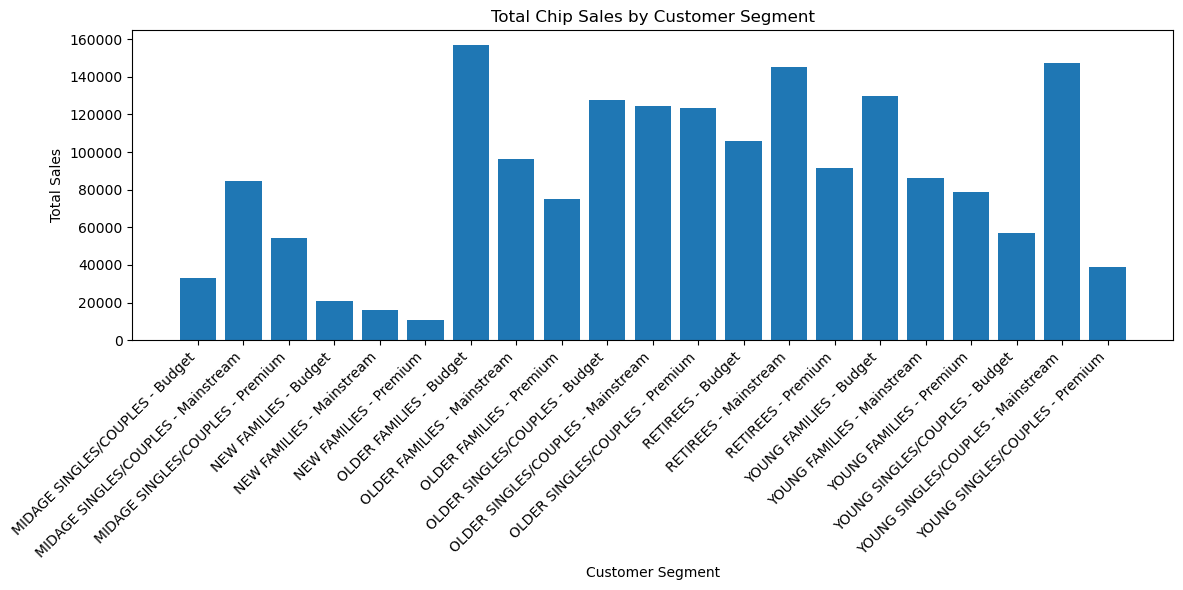

In [68]:
# Check if merged_df exists
if 'merged_df' not in globals():
    raise NameError("merged_df is not defined in this environment. Please load your merged dataset first.")

# 1. Calculate total sales by segment
sales_by_segment = (
    merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']
    .sum()
    .reset_index()
)

# 2. Create a combined segment label for easy plotting
sales_by_segment['SEGMENT'] = (
    sales_by_segment['LIFESTAGE'] + " - " + sales_by_segment['PREMIUM_CUSTOMER']
)

# 3. Plot
plt.figure(figsize=(12,6))
plt.bar(sales_by_segment['SEGMENT'], sales_by_segment['TOT_SALES'])
plt.xticks(rotation=45, ha='right')
plt.title("Total Chip Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


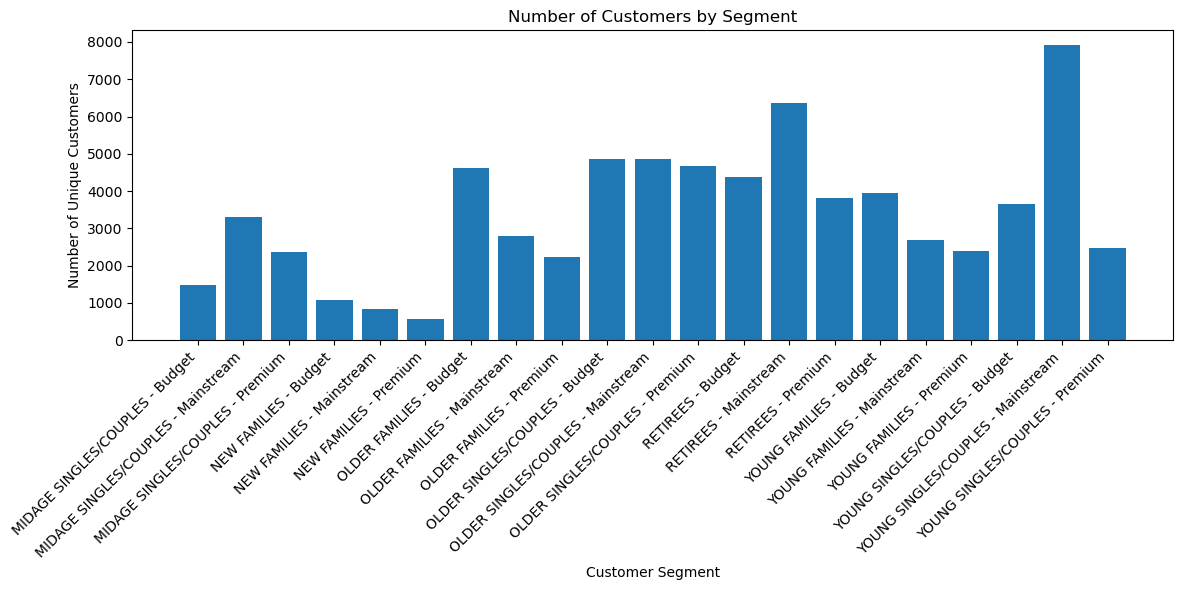

In [69]:
customers_by_segment = (
    merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR']
    .nunique()
    .reset_index(name='unique_customers')
)

customers_by_segment
# Create combined label
customers_by_segment['SEGMENT'] = (
    customers_by_segment['LIFESTAGE'] + " - " + customers_by_segment['PREMIUM_CUSTOMER']
)

plt.figure(figsize=(12,6))
plt.bar(customers_by_segment['SEGMENT'], customers_by_segment['unique_customers'])
plt.xticks(rotation=45, ha='right')
plt.title("Number of Customers by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Unique Customers")
plt.tight_layout()
plt.show()


In [172]:
#Calculate Average Units per Customer
# Total units purchased in each segment
units_by_segment = (
    merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY']
    .sum()
    .reset_index(name='total_units')
)

# Number of unique customers in each segment
customers_by_segment = (
    merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR']
    .nunique()
    .reset_index(name='unique_customers')
)

# Merge the two summaries
avg_units = units_by_segment.merge(
    customers_by_segment,
    on=['LIFESTAGE', 'PREMIUM_CUSTOMER']
)

# Calculate average units per customer
avg_units['avg_units_per_customer'] = (
    avg_units['total_units'] / avg_units['unique_customers']
)

avg_units


,LIFESTAGE,PREMIUM_CUSTOMER,total_units,unique_customers,avg_units_per_customer
0,MIDAGE SINGLES/COUPLES,Budget,8883,1474,6.026459
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,3298,6.432080
2,MIDAGE SINGLES/COUPLES,Premium,14400,2369,6.078514
3,NEW FAMILIES,Budget,5241,1087,4.821527
4,NEW FAMILIES,Mainstream,4060,830,4.891566
5,NEW FAMILIES,Premium,2769,575,4.815652
6,OLDER FAMILIES,Budget,41853,4611,9.076773
7,OLDER FAMILIES,Mainstream,25804,2788,9.255380
8,OLDER FAMILIES,Premium,20239,2231,9.071717
9,OLDER SINGLES/COUPLES,Budget,32883,4849,6.781398


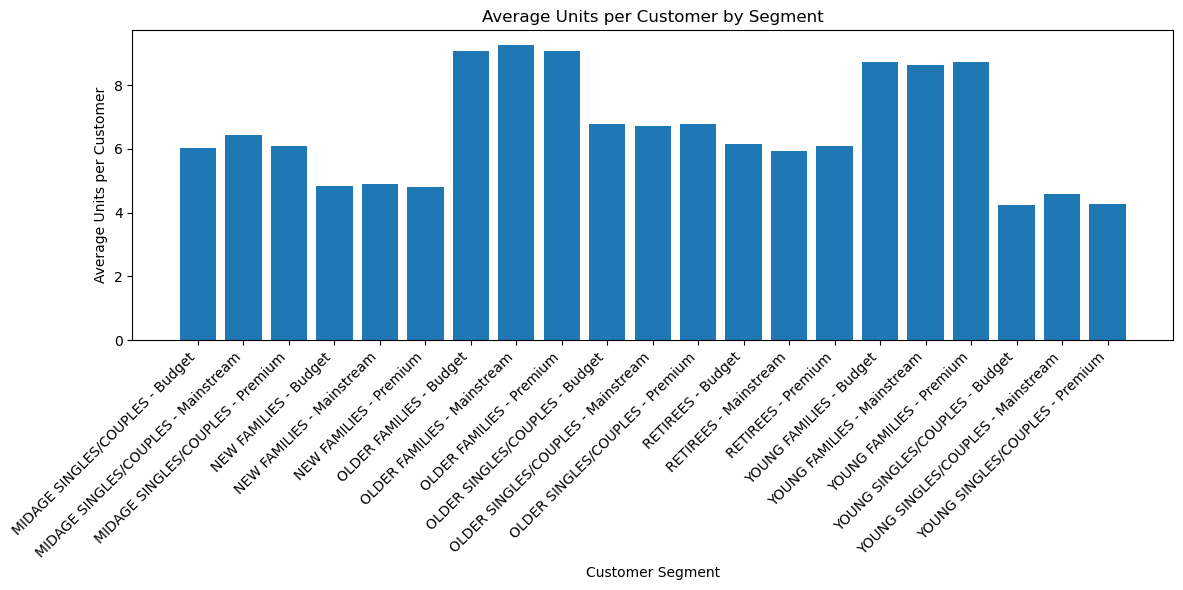

In [138]:
# Create combined label for plotting
avg_units['SEGMENT'] = (
    avg_units['LIFESTAGE'] + " - " + avg_units['PREMIUM_CUSTOMER']
)

plt.figure(figsize=(12,6))
plt.bar(avg_units['SEGMENT'], avg_units['avg_units_per_customer'])
plt.xticks(rotation=45, ha='right')
plt.title("Average Units per Customer by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Units per Customer")
plt.tight_layout()
plt.show()


In [140]:
#Calculate Average Price per Unit
# Create a column for unit price per transaction
merged_df['UNIT_PRICE'] = merged_df['TOT_SALES'] / merged_df['PROD_QTY']

# Calculate average unit price per segment
avg_price_segment = (
    merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['UNIT_PRICE']
    .mean()
    .reset_index(name='avg_unit_price')
)

avg_price_segment


,LIFESTAGE,PREMIUM_CUSTOMER,avg_unit_price
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
5,NEW FAMILIES,Premium,3.872110
6,OLDER FAMILIES,Budget,3.745340
7,OLDER FAMILIES,Mainstream,3.737077
8,OLDER FAMILIES,Premium,3.717000
9,OLDER SINGLES/COUPLES,Budget,3.882096


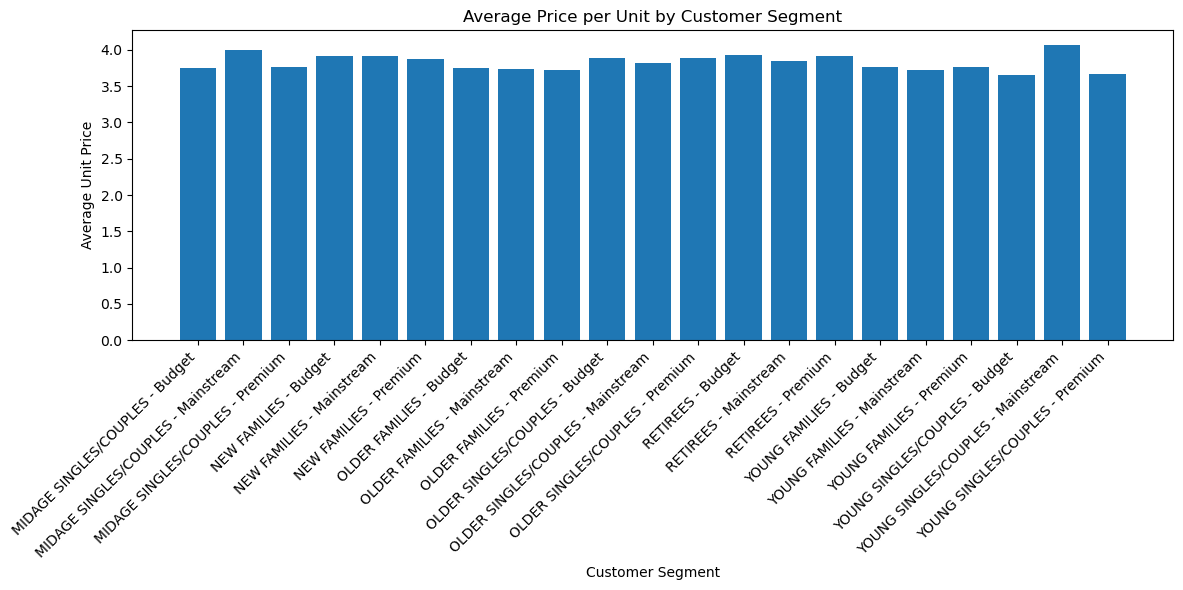

In [142]:
#Plot Average Unit Price per Segment
# Create combined segment label for plotting
avg_price_segment['SEGMENT'] = (
    avg_price_segment['LIFESTAGE'] + " - " + avg_price_segment['PREMIUM_CUSTOMER']
)

plt.figure(figsize=(12,6))
plt.bar(avg_price_segment['SEGMENT'], avg_price_segment['avg_unit_price'])
plt.xticks(rotation=45, ha='right')
plt.title("Average Price per Unit by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Unit Price")
plt.tight_layout()
plt.show()


In [146]:
from scipy.stats import ttest_ind
# Total units per customer
customer_units = merged_df.groupby('LYLTY_CARD_NBR').agg({
    'PROD_QTY': 'sum',
    'LIFESTAGE': 'first',
    'PREMIUM_CUSTOMER': 'first'
}).reset_index()
# Group 1: Mainstream vs Premium
mainstream = customer_units[customer_units['PREMIUM_CUSTOMER'] == 'Mainstream']['PROD_QTY']
premium_budget = customer_units[customer_units['PREMIUM_CUSTOMER'].isin(['Premium','Budget'])]['PROD_QTY']

# Group 2: Mid-age vs Young singles & couples
midage = customer_units[customer_units['LIFESTAGE'] == 'Mid-age']['PROD_QTY']
young_singles_couples = customer_units[customer_units['LIFESTAGE'] == 'Young singles & couples']['PROD_QTY']
# T-test for Premium vs Mainstream
t_stat1, p_val1 = ttest_ind(mainstream, premium_budget, equal_var=False)
print("T-test: Mainstream vs Premium/Budget")
print("t-statistic:", t_stat1)
print("p-value:", p_val1)

# T-test for Mid-age vs Young singles & couples
t_stat2, p_val2 = ttest_ind(midage, young_singles_couples, equal_var=False)
print("\nT-test: Mid-age vs Young singles & couples")
print("t-statistic:", t_stat2)
print("p-value:", p_val2)



T-test: Mainstream vs Premium/Budget
t-statistic: -13.5419806097209
p-value: 1.0077790631152658e-41

T-test: Mid-age vs Young singles & couples
t-statistic: nan
p-value: nan


Top Brands by Sales:
         BRAND  TOT_SALES
12     Kettle    35423.6
6     Doritos    17266.4
15   Pringles    16006.2
19     Smiths    14337.5
24   Twisties     7539.8
23   Tostitos     7238.0
22      Thins     7217.1
10  Infuzions     6693.6
4        Cobs     6144.6
25   Tyrrells     4800.6

Top Brands by Units:
         BRAND  PROD_QTY
12     Kettle      7172
15   Pringles      4326
6     Doritos      3878
19     Smiths      3252
22      Thins      2187
10  Infuzions      1802
24   Twisties      1673
23   Tostitos      1645
4        Cobs      1617
17        Rrd      1160


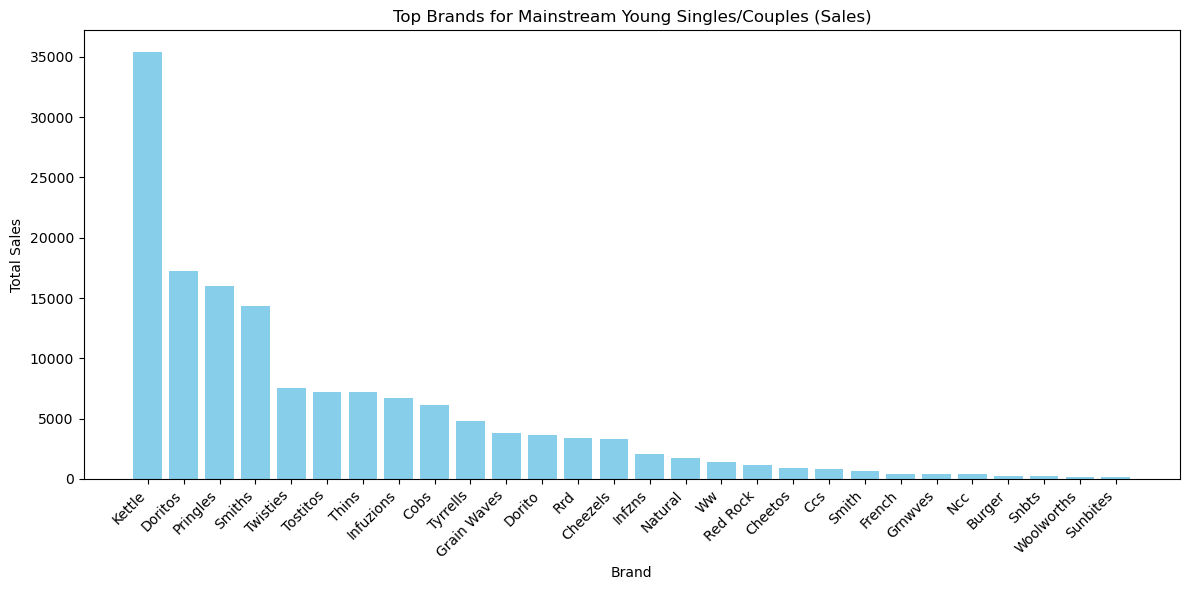

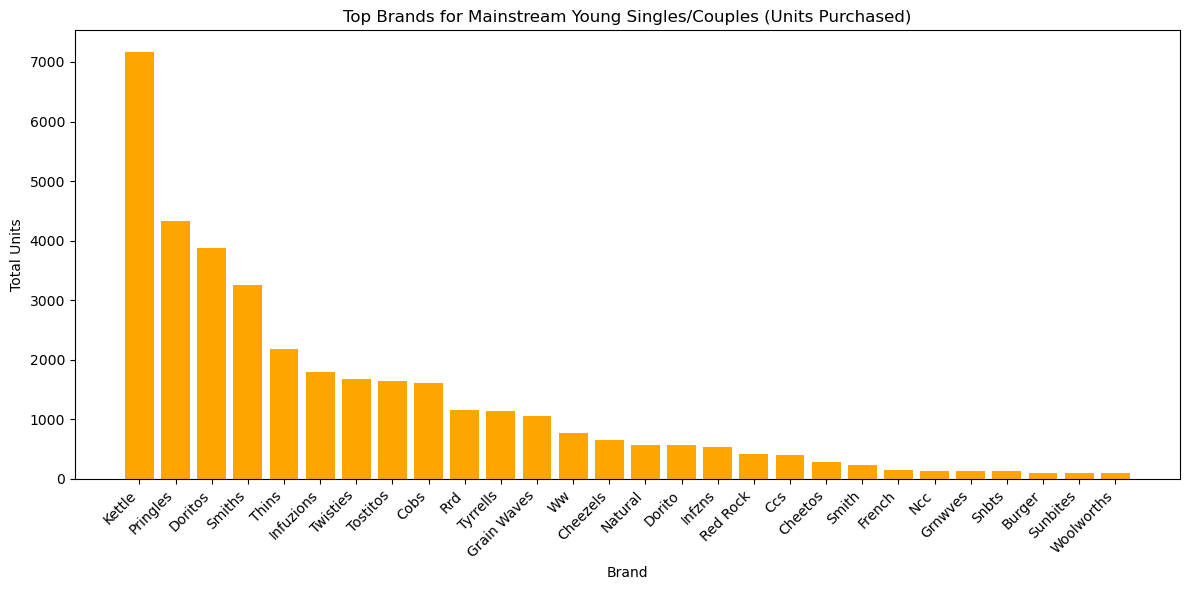

In [184]:
# Filter Mainstream + Young singles & couples
# Filter segment
# Ensure plots show in notebook
%matplotlib inline

# --- 1. Standardize strings to avoid mismatches ---
merged_df['PREMIUM_CUSTOMER'] = merged_df['PREMIUM_CUSTOMER'].str.strip().str.title()
merged_df['LIFESTAGE'] = merged_df['LIFESTAGE'].str.strip().str.title()

# --- 2. Filter Mainstream Young Singles/Couples ---
target_segment = merged_df[
    (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged_df['LIFESTAGE'] == 'Young Singles/Couples')
]

# --- 3. Total sales per brand ---
brand_sales = (
    target_segment.groupby('BRAND')['TOT_SALES']
    .sum()
    .reset_index()
    .sort_values(by='TOT_SALES', ascending=False)
)

# --- 4. Total units per brand ---
brand_units = (
    target_segment.groupby('BRAND')['PROD_QTY']
    .sum()
    .reset_index()
    .sort_values(by='PROD_QTY', ascending=False)
)

# --- 5. Print top brands ---
print("Top Brands by Sales:\n", brand_sales.head(10))
print("\nTop Brands by Units:\n", brand_units.head(10))

# --- 6. Plot top brands by sales ---
plt.figure(figsize=(12,6))
plt.bar(brand_sales['BRAND'], brand_sales['TOT_SALES'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top Brands for Mainstream Young Singles/Couples (Sales)")
plt.xlabel("Brand")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# --- 7. Plot top brands by units ---
plt.figure(figsize=(12,6))
plt.bar(brand_units['BRAND'], brand_units['PROD_QTY'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title("Top Brands for Mainstream Young Singles/Couples (Units Purchased)")
plt.xlabel("Brand")
plt.ylabel("Total Units")
plt.tight_layout()
plt.show()



In [186]:
#find out if our target segment tends to buy larger packs of chips
# Filter Mainstream Young Singles/Couples
target_segment = merged_df[
    (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged_df['LIFESTAGE'] == 'Young Singles/Couples')
]
# Summary statistics for pack size
pack_summary = target_segment['PACK_SIZE'].describe()
print(pack_summary)


count    19544.000000
mean       178.344249
std         63.916248
min         70.000000
25%        135.000000
50%        170.000000
75%        175.000000
max        380.000000
Name: PACK_SIZE, dtype: float64


In [188]:
# Average pack size by segment
avg_pack_by_segment = merged_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PACK_SIZE'].mean().reset_index()
print(avg_pack_by_segment)


   PREMIUM_CUSTOMER               LIFESTAGE   PACK_SIZE
0            Budget  Midage Singles/Couples  174.182690
1            Budget            New Families  174.766643
2            Budget          Older Families  175.546342
3            Budget   Older Singles/Couples  175.334673
4            Budget                Retirees  176.395641
5            Budget          Young Families  175.459720
6            Budget   Young Singles/Couples  173.378981
7        Mainstream  Midage Singles/Couples  177.898693
8        Mainstream            New Families  175.629748
9        Mainstream          Older Families  175.175666
10       Mainstream   Older Singles/Couples  174.812145
11       Mainstream                Retirees  175.213671
12       Mainstream          Young Families  174.202059
13       Mainstream   Young Singles/Couples  178.344249
14          Premium  Midage Singles/Couples  174.585391
15          Premium            New Families  175.245296
16          Premium          Older Families  174

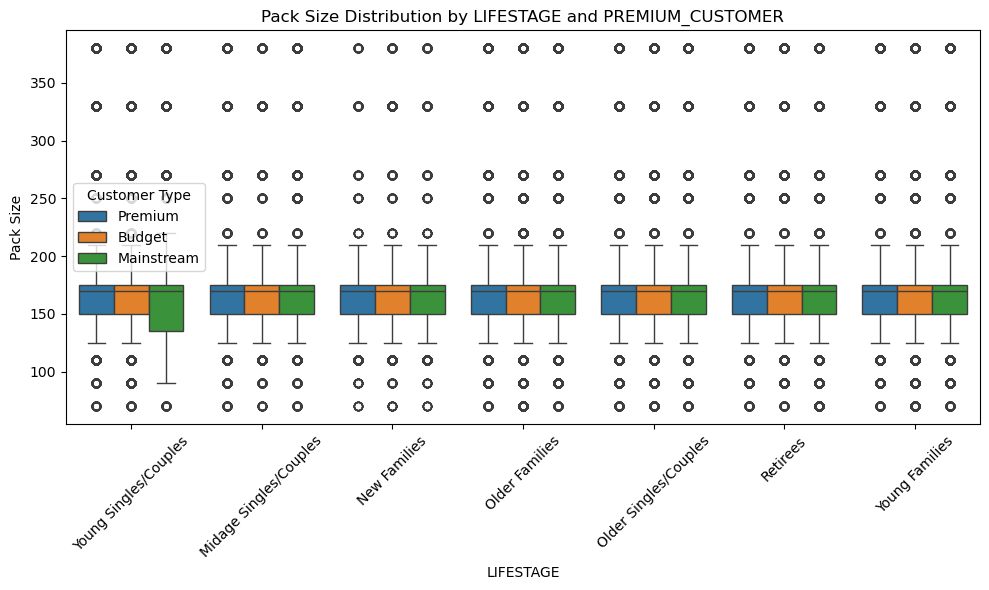

In [190]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='LIFESTAGE', 
    y='PACK_SIZE', 
    hue='PREMIUM_CUSTOMER', 
    data=merged_df
)
plt.title("Pack Size Distribution by LIFESTAGE and PREMIUM_CUSTOMER")
plt.ylabel("Pack Size")
plt.xlabel("LIFESTAGE")
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


                   count        mean        std   min    25%    50%    75%  \
TARGET_SEGMENT                                                               
False           246740.0  175.583521  59.432118  70.0  150.0  170.0  175.0   

                  max  
TARGET_SEGMENT         
False           380.0  
              Segment   PACK_SIZE
0  Rest of Population  175.583521


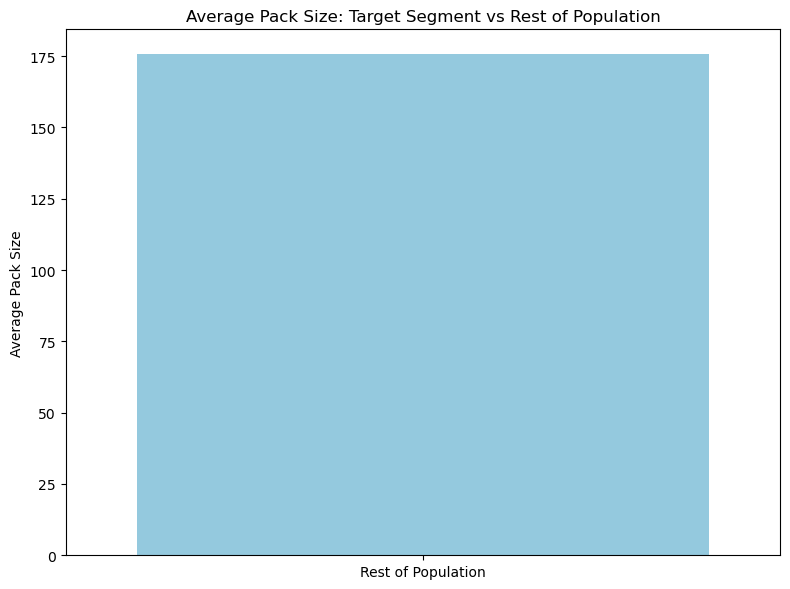

In [192]:
# Flag target segment
merged_df['TARGET_SEGMENT'] = (
    (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
)
# Average pack size by segment
pack_summary = merged_df.groupby('TARGET_SEGMENT')['PACK_SIZE'].describe()
print(pack_summary)
avg_pack = merged_df.groupby('TARGET_SEGMENT')['PACK_SIZE'].mean().reset_index()
avg_pack['Segment'] = avg_pack['TARGET_SEGMENT'].replace({True: 'Mainstream Young Singles/Couples', False: 'Rest of Population'})
print(avg_pack[['Segment','PACK_SIZE']])

plt.figure(figsize=(8,6))
sns.barplot(
    x='Segment', 
    y='PACK_SIZE', 
    data=avg_pack,
    palette=['skyblue','lightgreen']
)
plt.title("Average Pack Size: Target Segment vs Rest of Population")
plt.ylabel("Average Pack Size")
plt.xlabel("")
plt.tight_layout()
plt.show()
